<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера v1</h1>

Александра привет! Меня зовут Дмитрий Пышненко, и я буду проверять твой проект. Предлагаю общаться на «ты» если ты не против 😊 Но если нет, то дай знать, и мы перейдем на "вы". 
    
Для своих комментариев я буду использовать цветовую разметку:

<div class="alert alert-success">
    <b>Успех:</b> все сделано правильно.
</div>
<div class="alert alert-warning">
    <b>Есть замечания:</b> так выделены небольшие замечания которые не критичны, но было бы здорово исправить. Если таких замечаний немного, то такой проект может быть принят.
</div>
<div class="alert alert-danger">
    <b>Нужно переделать:</b> есть замечания которые необходимо исправить или доделать для сдачи проекта.
</div>
    
Я буду поддерживать версионность комментариев, и при следующих итерациях я буду оставлять ячейки с новой версией v2 (v3 и.т.д.)"
    
Если у тебя есть вопросы, замечания или отвечаешь на комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии: 
<div class="alert alert-info"> <b>Комментарий студента:</b>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v1:</b>
    
<b>Общее впечатление:</b> 
 
- Отличная работа по анализу A/B-тестирования! В проекте методично проведена предобработка данных, выполнен содержательный анализ результатов эксперимента и сформулированы четкие выводы, подкрепленные фактами. Особенно ценны наблюдения о параметрах теста и оценке его корректности. Структурированные выводы делают исследование понятным и информативным.
- Осталось исправить совсем чуть-чуть для сдачи проекта (буду также рад исправлениям желтых:):
    - Поменять способ подсчета метрик: cделать расчет по уникальным пользователям, а не по сессиям.
    - Поправить графики.



Буду ждать новую версию на повторную проверку 😇 Успехов!

</div>

<div class="alert alert-info"> <b>Привет, Дмитрий! Благодарю за проверку моего проекта, комментарии были очень подробные и понятные, постаралась исправить все существенные недочеты</b>


<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>
    
Очень здорово, что ты дополнительно поработала над проектом и внесла улучшения по комментариям! 😇
    
Было интересно проверять твой проект, и мне осталось только пожелать тебе успехов в следующих спринтах. 🍀 Буду также очень рад любому фидбеку и предложениям по улучшению моего код-ревью.
    
А здесь можно найти больше примеров того, как проводить А/Б-тестирование: 

https://habr.com/ru/company/boodet_online/blog/498688/
    
https://vc.ru/u/1174886-koptelnya/413265-chto-takoe-a-b-testirovanie-i-kak-provesti-ego-pravilno-urok-1    
 
    
</div>

# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Отличная вводная часть проекта! Данный шаблон можно дополнить, например, немного раскрыть шаги работы с данными, или раскрыть задачу АВ тестирования. Например, указать:
    
- какая основная метрика, изменение которой ожидается в ходе проведения АВ эксперимента (в нашем случае это увеличение доли сессий с четырьмя и более просмотренными страницами);
- обсудить изменения каких других метрик необходимо отслеживать (в нашем случае это отсутствие изменения числа сессий в день);
- указать информацию о аудитории теста и других особенностях его проведения (например, то, что вовлекается все аудитория приложения, т.е. новая опция раскатывается на всех).

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind

In [2]:
# Выгружаем данные в переменную sessions_history
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

In [3]:
# Выводим первые строки датафрейма sessions_history
display(sessions_history.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


In [4]:
sessions_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435924 entries, 0 to 435923
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            435924 non-null  object
 1   session_id         435924 non-null  object
 2   session_date       435924 non-null  object
 3   session_start_ts   435924 non-null  object
 4   install_date       435924 non-null  object
 5   session_number     435924 non-null  int64 
 6   registration_flag  435924 non-null  int64 
 7   page_counter       435924 non-null  int64 
 8   region             435924 non-null  object
 9   device             435924 non-null  object
dtypes: int64(3), object(7)
memory usage: 33.3+ MB


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">


<b>Комментарий ревьюера v1:</b>

Данные загружены и выведены верно.

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Комментарий ревьюера v1:</b>

Можно дополнительно вывести базовый анализ структуры датафрейма:
    
```python
df_sessions_project_history.info()

or 
    
df_sessions_project_history.describe()
```

#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Комментарий ревьюера v1:</b>

В данном случае ты считаешь уникальные сессии, поэтому дубликаты не будут влиять на их количество, но в общем в начале лучше изучить данные и минимально их проверить, например на дубликаты.

In [5]:
# Проверяем данные на дубликаты
count_duplicates = sessions_history.duplicated().sum()
display(count_duplicates)

0

In [6]:
# Считаем количество уникальных сессий для каждого пользователя
count_sessions = sessions_history.groupby('user_id')['session_id'].nunique()
count_sessions = count_sessions.sort_values(ascending=False)
display(count_sessions)

user_id
10E0DEFC1ABDBBE0    10
6A73CB5566BB494D    10
8A60431A825D035B     9
D11541BAC141FB94     9
5BCFE7C4DCC148E9     9
                    ..
1DF13BB1953B3497     1
628502A3CE7E0A3C     1
1DEEF40DEFBD0C65     1
AC08479B7472C628     1
8A0882B6715D9EE5     1
Name: session_id, Length: 134039, dtype: int64

In [7]:
# Выводим сессии пользователя с наибольшим количеством сессий
display(sessions_history[sessions_history['user_id']=='10E0DEFC1ABDBBE0'])

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Твое решение корректно находит пользователя с наибольшим количеством сессий и фильтрует данные.


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [8]:
# Меняем тип данных для столбца, содержащего информацию о дате сессии
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])
sessions_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435924 entries, 0 to 435923
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            435924 non-null  object        
 1   session_id         435924 non-null  object        
 2   session_date       435924 non-null  datetime64[ns]
 3   session_start_ts   435924 non-null  object        
 4   install_date       435924 non-null  object        
 5   session_number     435924 non-null  int64         
 6   registration_flag  435924 non-null  int64         
 7   page_counter       435924 non-null  int64         
 8   region             435924 non-null  object        
 9   device             435924 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 33.3+ MB


<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;">

<b>Комментарий ревьюера v1:</b>

Eсть важный момент с тем, как ты готовишь данные по дням. Cейчас ты извлекаешь только число месяца (например, 1, 15, 31). Затем, группируя по этому столбцу, ты смешиваешь данные за одинаковые числа разных месяцев. Например, активность за 1 августа, 1 сентября и 1 октября суммируется и отображается как активность для "дня 1".

Из-за этого твои графики показывают не реальную динамику день за днем на протяжении всего периода, а скорее усредненную или общую картину для каждого числа месяца. Для анализа того, как показатели меняются во времени (например, от 15 августа к 16 августа, затем к 17 августа и т.д.), нужно группировать данные по полной дате сессии (session_date), а не только по дню месяца.

In [9]:
# Делаем группировку по количеству уникальных пользователей по дням
group_days = sessions_history.groupby('session_date')['user_id'].nunique().reset_index()
display(group_days)

,session_date,user_id
0,2025-08-11,3919
1,2025-08-12,6056
2,2025-08-13,8489
3,2025-08-14,10321
4,2025-08-15,14065
5,2025-08-16,12205
6,2025-08-17,11200
7,2025-08-18,10839
8,2025-08-19,12118
9,2025-08-20,13514


In [10]:
# Фильтруем зарегистрированных пользователей, делаем группировку по количеству уникальных пользователей по дням
only_reg = sessions_history[sessions_history['registration_flag']==1]
group_days_reg = only_reg.groupby('session_date')['user_id'].nunique().reset_index()
display(group_days_reg)

,session_date,user_id
0,2025-08-11,169
1,2025-08-12,336
2,2025-08-13,464
3,2025-08-14,625
4,2025-08-15,840
5,2025-08-16,916
6,2025-08-17,833
7,2025-08-18,860
8,2025-08-19,831
9,2025-08-20,1008


In [11]:
# Соединяем две таблицы, меняем названия столбцов
groups = group_days.merge(group_days_reg, on='session_date')
groups = groups.rename(columns={'user_id_x': 'total_users'})
groups = groups.rename(columns={'user_id_y': 'reg_users'})
display(groups)

,session_date,total_users,reg_users
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


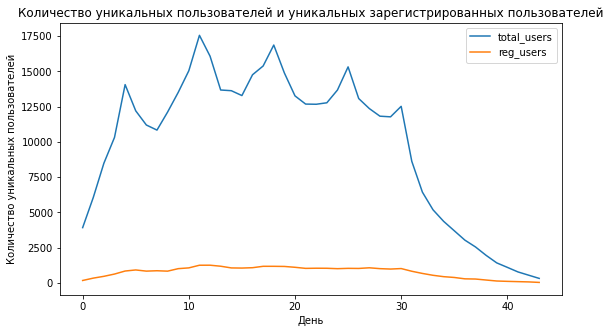

In [12]:
# Строим линейный график по количеству уникальных пользователей и по количеству уникальных зарегистрированных пользователей
groups[['total_users', 'reg_users']].plot(kind='line', legend=True, title='Количество уникальных пользователей и уникальных зарегистрированных пользователей', figsize=(9,5))
plt.xlabel('День')
plt.ylabel('Количество уникальных пользователей')
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v2:</b>

График динамики числа пользователей реализован корректно! График наглядно отображает тренды как для всех пользователей, так и для зарегистрированных.
    


<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Комментарий ревьюера v1:</b>

Можно также сделать график чуть крупнее.

In [13]:
# Считаем долю зарегистрированных пользователей от общего числа пользователей
groups['share_reg'] = groups['reg_users']/groups['total_users']
display(groups)

,session_date,total_users,reg_users,share_reg
0,2025-08-11,3919,169,0.043123
1,2025-08-12,6056,336,0.055482
2,2025-08-13,8489,464,0.054659
3,2025-08-14,10321,625,0.060556
4,2025-08-15,14065,840,0.059723
5,2025-08-16,12205,916,0.075051
6,2025-08-17,11200,833,0.074375
7,2025-08-18,10839,860,0.079343
8,2025-08-19,12118,831,0.068576
9,2025-08-20,13514,1008,0.074589


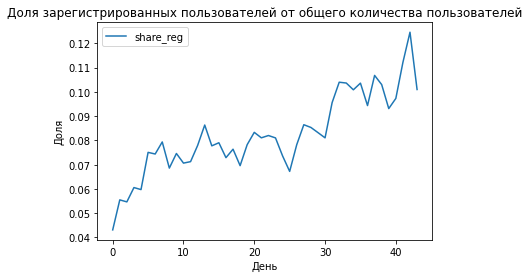

In [14]:
# Строим линейный график по доле зарегистрированных пользователей от общего числа пользователей
groups['share_reg'].plot(kind='line', legend=True, title='Доля зарегистрированных пользователей от общего количества пользователей')
plt.xlabel('День')
plt.ylabel('Доля')
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v2:</b>

Отличные графики. Можно дополнительно добавить количественные показатели, например:

- Среднее значение доли зарегистрированных пользователей
- Дни с максимальным и минимальным значением доли

По графику видно, что доля зарегистрированных пользователей со временем увеличивается

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [15]:
# Делаем группировку по количеству сессий по количеству просмотренных страниц
counts_sessions = sessions_history.groupby('page_counter')['session_id'].count()
display(counts_sessions)

page_counter
1     29160
2    105536
3    166690
4    105569
5     26288
6      2589
7        92
Name: session_id, dtype: int64

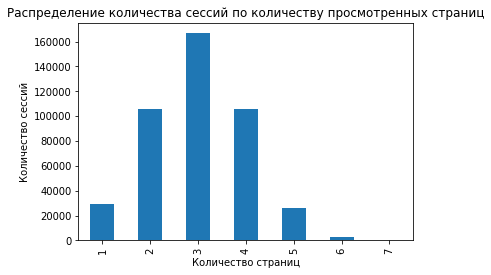

In [16]:
# Строим столбчатую диаграмму распределения количества сессий по количеству просмотренных страниц
counts_sessions.plot(kind='bar', title='Распределение количества сессий по количеству просмотренных страниц', xlabel='Количество страниц', ylabel='Количество сессий')
plt.show()

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Можно добавить подписи значений над столбцами:
    
```python
for i, v in enumerate(page_view_counts.values):
    plt.text(page_view_counts.index[i], v, str(v), ha='center', va='bottom')
```

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Верный график и результаты 👏

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [17]:
# Создаем функцию, которая сохраняет значения 1 или 0 в зависимости от количества просмотренных страниц. 
# Создаем новый столбец, отражающий успешность сессий
def counts_pages(value):
    if value >= 4:
        return 1
    else:
        return 0
sessions_history['good_session'] = sessions_history['page_counter'].apply(counts_pages)    
display(sessions_history[['page_counter', 'good_session']])   

,page_counter,good_session
0,3,0
1,4,1
2,4,1
3,4,1
4,3,0
...,...,...
435919,3,0
435920,4,1
435921,4,1
435922,4,1


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Отличное решение использовать булево выражение с преобразованием в int для создания бинарного признака.
    
Тут можно также использовать `np.where()` - может быть предпочтительнее в более сложных случаях или при работе с большими объемами данных
    
```python
df_sessions_project_history["good_session"] = np.where(df_sessions_project_history["page_counter"] >= 4, 1, 0)
```
    

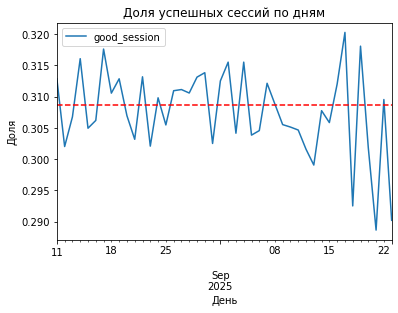

In [18]:
# Делаем группировку по среднему количеству успешных сессий по дням, строим линейный график по доле успешных сессий
group_avg = sessions_history.groupby("session_date").agg({"good_session" : 'mean'})
group_avg.plot(kind='line', title='Доля успешных сессий по дням')
plt.xlabel('День')
plt.ylabel('Доля')
mean_all = sessions_history['good_session'].mean()
plt.axhline(mean_all, color='red', linestyle='--', label='Среднее значение')
plt.show()

In [19]:
# Pасчета стандартного отклонения
print(f"Среднее за весь период: {mean_all}")
std_dev = sessions_history['good_session'].std()
print(f'Стандартное отклонение: {std_dev}')  

Среднее за весь период: 0.30862719189583504
Стандартное отклонение: 0.46192741616004496


Значение стандартного отклонения свидетельствует о довольно большом разбросе данных. Поскольку стаднратное отклонение выше среднего, это указывает на достаточно высокий уровень вариации данных

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

График информативен и хорошо оформлен.
    
Если наблюдается снижение метрики, это может быть связано со спадом активности пользователей.

Высокая вариативность может указывать на нестабильность поведения пользователей.
    
Дополнительно можно добавить больше информации по целевой метрике:
    
- Расчитать среднее значение целевой метрики за весь период и за последний период времени.

```python
# Среднее значение за весь период
mean_all = daily_good_sessions["good_session"].mean()

# Среднее значение за последний период (например, последние 7 дней)
mean_last_period = daily_good_sessions.tail(7)["good_session"].mean()

print(f"Среднее за весь период: {mean_all}")
print(f"Среднее за последний период: {mean_last_period}")
```
    
Можно также добавить линию среднего значения на график:
    
```python
# Линия среднего значения
plt.axhline(mean_all, color='red', linestyle='--', label="Среднее значение")
```    
    
Также было бы полезно указать на вариативность метрики в последний период, что связано с спадом активности.
 
```python
# Пример расчета стандартного отклонения
std_dev = daily_good_sessions["good_session"].std()
print(f"Стандартное отклонение: {std_dev}")    
```       

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [20]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Все верно!
    
`power` можно также задать через `beta`: `power = 1 - beta`
    
    
PS: В параметр effect_size передается абсолютная разница (MDE = 0.03), но для NormalIndPower требуется стандартизированная разница (Cohen’s h). Это приводит к некорректному расчету размера выборки.
    
Рассчитать стандартизированную разницу можно по формуле:
   
```python
p1 = 0.5  # Базовая конверсия (пример)
p2 = p1 + mde
effect_size = (p2 - p1) / np.sqrt((p1*(1-p1) + p2*(1-p2))/2)
```
 
Стандартизированная разница учитывает не только величину эффекта, но и дисперсию данных. Игнорирование этого приводит к заниженным/завышенным оценкам размера выборки.

#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [21]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history.groupby('session_date').agg({"user_id" : 'nunique'}).mean().iloc[0]

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size*2/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дня")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907.363636363636 пользователей в день составит 4 дня


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Также все верно! 
    

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [22]:
# Выгружаем данные в переменную sessions_test_part
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')

In [23]:
# Делаем группировку по количеству уникальных пользователей по группам
group_test = sessions_test_part.groupby(['session_date', 'test_group'])['user_id'].nunique()
display(group_test)

session_date  test_group
2025-10-14    A             1477
              B             1466
Name: user_id, dtype: int64

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Комментарий ревьюера v1:</b>

В группировку данных можно добавить также агрегацию по дням, чтобы код можно использовать дальше для анализа теста.

In [24]:
# Рассчитываем процентную разницу в количестве пользователей в группах
a = 1477
b = 1466
p = 100 * abs(a - b) / a
print(f'Процентная разница составляет {round(p,2)}%')

Процентная разница составляет 0.74%


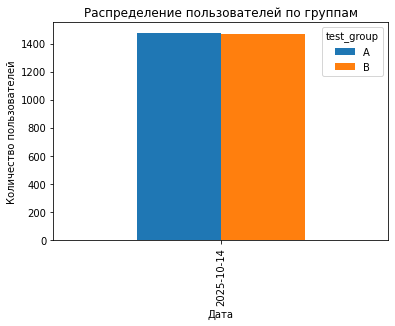

In [25]:
daily_users = sessions_test_part.groupby(['session_date', 'test_group'])['user_id'].nunique().unstack()
daily_users.plot(kind='bar', figsize=(6, 4), xlabel='Дата', ylabel='Количество пользователей')
plt.title('Распределение пользователей по группам')
plt.show()

<div style="background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 4px; border: 1px solid #ffeeba;">

<b>Комментарий ревьюера v1:</b>

Можно также построить столбчатый график или вывести таблицу с распределением пользователей по группам.
    
```python
daily_users = sessions_test_part.groupby(['session_date', 'test_group'])['user_id'].nunique().unstack()
daily_users.plot(kind='bar', figsize=(12, 6))
plt.title('Распределение пользователей по группам')
plt.show()
```

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [26]:
# Создаем переменные, содержащие информацию только о пользователях группы А и В, 
# находим количество пользователей, находящихся в обеих группах
group_a = sessions_test_part[sessions_test_part['test_group']=='A']
group_b = sessions_test_part[sessions_test_part['test_group']=='B']
len(set(group_a['user_id']).intersection(set(group_b['user_id'])))

0

Группы независимы. Пользователей, встречающихся в обеих группах не обнаружено

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>


Проверка пересечений пользователей проведена верно! Важный шаг для любого АВ теста, где предполагается независимый тест.

#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


In [27]:
# Делаем группировку по доле каждого типа устройства для пользователей группы А
group_a_share = group_a.groupby('device')['user_id'].nunique()/group_a['user_id'].nunique()
display(group_a_share)

device
Android    0.444144
Mac        0.105619
PC         0.249831
iPhone     0.200406
Name: user_id, dtype: float64

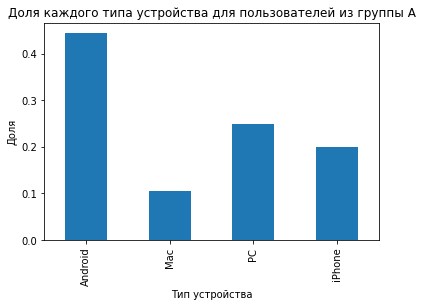

In [28]:
# Строим столбчатую диаграмму по доле каждого типа устройства для пользователей из группы A
group_a_share.plot(kind='bar', title='Доля каждого типа устройства для пользователей из группы A', xlabel='Тип устройства', ylabel='Доля')
plt.show()

In [29]:
# Делаем группировку по доле каждого типа устройства для пользователей группы В
group_b_share = group_b.groupby('device')['user_id'].nunique()/group_b['user_id'].nunique()
display(group_b_share)

device
Android    0.455662
Mac        0.100955
PC         0.259891
iPhone     0.183492
Name: user_id, dtype: float64

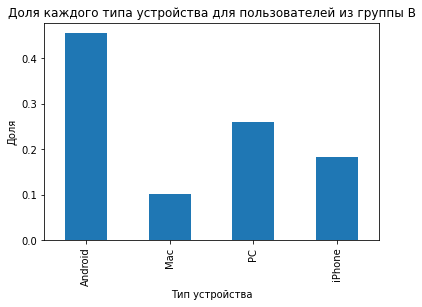

In [30]:
# Строим столбчатую диаграмму по доле каждого типа устройства для пользователей из группы В
group_b_share.plot(kind='bar', title='Доля каждого типа устройства для пользователей из группы B', xlabel='Тип устройства', ylabel='Доля')
plt.show()

Распределение устройств в группах очень близкое друг к другу, можно сделать вывод о совпадении

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;">

<b>Комментарий ревьюера v1:</b>

Обрати пожалуйста внимание, что в текущей реализации ты анализируешь распределение устройств по сессиям, а не по уникальным пользователям. Это может привести к неверным выводам. Один пользователь может иметь несколько сессий на одном устройстве, что искажает анализ равномерности распределения пользователей. Например, если в группе A есть активный пользователь с 10 сессиями на iOS, это может создать ложное впечатление о преобладании iOS-пользователей.
    
В данном случае нужно провести анализ по уникальным пользователям.
    
Поправишь, пожалуйста?

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v2:</b>

Отлично! Здорово, что поправила.

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


In [31]:
# Делаем группировку по доле каждого региона для пользователей группы А
group_a_share_region = group_a.groupby('region')['user_id'].nunique()/group_a['user_id'].nunique()
display(group_a_share_region)

region
CIS     0.436019
EU      0.151659
MENA    0.412322
Name: user_id, dtype: float64

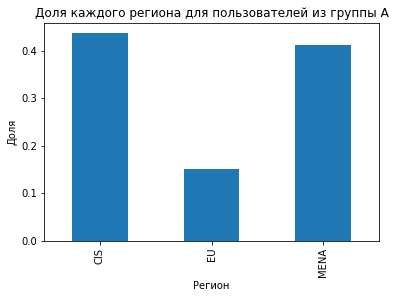

In [32]:
# Строим столбчатую диаграмму по доле каждого региона для пользователей из группы А
group_a_share_region.plot(kind='bar', title='Доля каждого региона для пользователей из группы A', xlabel='Регион', ylabel='Доля')
plt.show()

In [33]:
# Делаем группировку по доле каждого региона для пользователей группы В
group_b_share_region = group_b.groupby('region')['user_id'].nunique()/group_b['user_id'].nunique()
display(group_b_share_region)

region
CIS     0.439973
EU      0.148022
MENA    0.412005
Name: user_id, dtype: float64

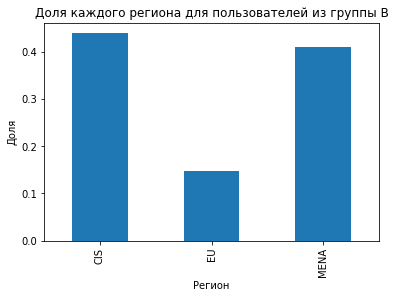

In [34]:
# Строим столбчатую диаграмму по доле каждого региона для пользователей из группы В
group_b_share_region.plot(kind='bar', title='Доля каждого региона для пользователей из группы B', xlabel='Регион', ylabel='Доля')
plt.show()

Распределение по регионам в группах очень близкое друг к другу, можно сделать вывод о совпадении

<div style="background-color: #f8d7da; color: #721c24; padding: 15px; border-radius: 4px; border: 1px solid #f5c6cb;">


<b>Комментарий ревьюера v1:</b>

Здесь также можешь, пожалуйста, посчитать распределения для уникальных пользователей вместо сессий?

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v2:</b>

Теперь все верно.

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

Различие в количестве пользователей в обеих группах присутствует, но оно не является существенным. Выборки независимы, так как не было выявлено пользователей, которые встречаются в обеих группах сразу. Распределение пользователей по устройствам не отличается, а по регионам все же имеет различия, в группе А преобладает CIS, в группе В - MENA.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Отличная работа! Были правильно проведены все необходимые проверки для оценки корректности A/B-теста и сделаны верные выводы. Молодец, что уделяешь внимание промежуточным результатам и подробно анализируешь равномерность распределения пользователей по группам, независимость выборок и сохранение распределения по ключевым признакам (устройствам и регионам).

Особенно важно, что была проверена процентная разница между группами и что она находится в допустимых пределах.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [35]:
# Выгружаем данные в переменную sessions_test
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')

In [36]:
# Используем функцию, которая сохраняет значения 1 или 0 в зависимости от количества просмотренных страниц. 
# Создаем новый столбец, отражающий успешность сессий
sessions_test['good_session'] = sessions_test['page_counter'].apply(counts_pages)    
display(sessions_test[['page_counter', 'good_session']]) 

,page_counter,good_session
0,3,0
1,2,0
2,2,0
3,1,0
4,2,0
...,...,...
100000,3,0
100001,5,1
100002,3,0
100003,4,1


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Данные загружены верно. 

#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [37]:
# Меняем тип данных столбца, который содержит информацию о дате
sessions_test['session_date'] = pd.to_datetime(sessions_test['session_date'])
sessions_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100005 entries, 0 to 100004
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            100005 non-null  object        
 1   session_id         100005 non-null  object        
 2   session_date       100005 non-null  datetime64[ns]
 3   session_start_ts   100005 non-null  object        
 4   install_date       100005 non-null  object        
 5   session_number     100005 non-null  int64         
 6   registration_flag  100005 non-null  int64         
 7   page_counter       100005 non-null  int64         
 8   region             100005 non-null  object        
 9   device             100005 non-null  object        
 10  test_group         100005 non-null  object        
 11  good_session       100005 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 9.2+ MB


In [38]:
# Выделяем день из даты сессий
sessions_test['days'] = sessions_test['session_date'].dt.day
display(sessions_test.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session,days
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0,26
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0,21
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0,23
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0,24
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0,17


In [39]:
# Делаем группировку по количеству уникальных сессий по дням и по группе
group_ab = sessions_test.groupby(['days', 'test_group'])['session_id'].nunique().reset_index()
display(group_ab)

,days,test_group,session_id
0,1,A,434
1,1,B,465
2,2,A,158
3,2,B,160
4,14,A,1502
5,14,B,1628
6,15,A,2235
7,15,B,2283
8,16,A,3280
9,16,B,3241


<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Хотя это и не указано в задании, я рекомендую всегда формулировать нулевую и альтернативную гипотезы перед проведением теста. Это помогает четко определить, что именно мы проверяем, и делает методологию более прозрачной как для тебя, так и для читателя. Такой подход упрощает интерпретацию результатов и снижает вероятность ошибок в анализе.

In [40]:
# Делаем группировку по количеству сессий в группах
group_ab_counts = sessions_test.groupby('test_group')['session_id'].nunique().reset_index()
display(group_ab_counts)

,test_group,session_id
0,A,49551
1,B,50454


In [41]:
# нулевая гипотеза: количество уникальных дневных сессий в двух выборках не различается, альтернативная:количество уникальных дневных сессий в двух выборках различается
metric_a = group_ab[group_ab['test_group']=='A']['session_id']
metric_b = group_ab[group_ab['test_group']=='B']['session_id']
result = st.ttest_ind(
    metric_a, 
    metric_b,
    equal_var=True
)
print(f'p-value={result.pvalue}')

p-value=0.938219304859116


p-value>0.05, принимаем нулевую гипотезу, разница в количестве сессий в группах не является существенной

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Отличная работа! Верно выбран и проведен тест. Полностью согласен с выводами.

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [42]:
# Фильтруем пользователей, считаем долю успешных сессий для группы А
groups_a = sessions_test[sessions_test['test_group']=='A']
counts_good_a = groups_a['good_session'].sum()/len(groups_a['good_session'])
display(counts_good_a)

0.3077233557344958

In [43]:
# Фильтруем пользователей, считаем долю успешных сессий для группы В
groups_b = sessions_test[sessions_test['test_group']=='B']
counts_good_b = groups_b['good_session'].sum()/len(groups_b['good_session'])
display(counts_good_b)

0.31828992745867524

In [44]:
# Находим разницу в долях успешных сессий в группах
delta = (counts_good_b - counts_good_a)*100
print(delta)

1.0566571724179463


Количество успешных сессий в тестовой выборке на 1.1% выше, чем в контрольной

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Все верно.

#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [45]:
# нулевая гипотеза: количество уникальных дневных сессий в двух выборках не различается, альтернативная:количество уникальных дневных сессий в двух выборках различается
metrics_a = sessions_test[sessions_test['test_group']=='A']['good_session']
metrics_b = sessions_test[sessions_test['test_group']=='B']['good_session']
result = st.ttest_ind(metrics_a, metrics_b, equal_var=True)
print('p-value:', result.pvalue)

p-value: 0.0003148608995858183


p-value<0.05, разница в количестве успешных сессий в группах является существенной, хоть и равна 1,1%. Значит новый алгоритм рекомендаций в приложении приносит положительные результаты

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Здорово, что получилось использовать t-критерий для анализа бинарного признака, такого как успешность сессии. В целом, это допустимый подход, и результаты будут очень близки к тем, которые дает z-тест для сравнения пропорций. Однако я бы рекомендовал попрактиковаться именно в использовании z-теста для таких случаев, поскольку он более специфичен для анализа пропорций и часто применяется в задачах A/B-тестирования. Это поможет тебе лучше понять его применение и укрепить навыки работы с различными статистическими методами.

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

В начале проекта были проанализированы исторические данные приложения, было рассчитано количество уникальных сессий для каждого пользователя, а также количество зарегистрированных пользователей и их доля от общего числа пользователей. Зарегистрированных пользователей оказалось крайне мало, но со временем их доля увеличивается.

Также был произведен анализ числа просмотренных страниц, было выявлено, что наибольшее количество сессий наблюдается при количестве просмотров 3 страниц (166.690). 

При подготовке к тесту был определен необходимый размер выборки для каждой группы, это значение составило 17.441. Далее при подсчете длительности теста определилось количество дней для проведения, а именно 4.

Немаловажной являлась проверка распределения пользователей, по типу устройства и по регионам различий не было.

Проверка количества сессий по группам показала несущественную разницу. Количество успешных сессий в тестовой выборке оказалось на 1,1% выше, чем в контрольной. Но тест показал, что эта разница существенная, таким образом, новый алгоритм рекомендаций положительно влияет на работу приложения.

<div style="background-color: #d4edda; color: #155724; padding: 15px; border-radius: 4px; border: 1px solid #c3e6cb;">

<b>Комментарий ревьюера v1:</b>

Отличная работа с выводами по A/B-тесту 💫 Ты структурировано представила все ключевые аспекты эксперимента. В целом, твой вывод логичен и обоснован - новый алгоритм действительно показал статистически значимое улучшение ключевой метрики, что подтверждает целесообразность его внедрения.